Needs to be implemented:

* alignment-baseline
* -toyplot-text-anchor-shift
* vertically center on first baseline

In [1]:
from PIL import Image, ImageDraw

import toyplot.font
import toyplot.text

import IPython.display

import xml.etree.ElementTree as xml
import sys
import logging
logging.basicConfig(level=logging.DEBUG)
toyplot.log.setLevel(logging.DEBUG)

In [2]:
text = """<span>This is <i>italic</i>, <b>bold</b>,<br/><code>monospace</code>, <small>small</small>, <span style="font-size:24px">large</span>,<br/><sup>superscript</sup> and <sub>subscript</sub> text<br/>for your amusement!</span>"""
style = {"font-family":"helvetica", "font-size":"16px"}
fonts = toyplot.font.ReportlabLibrary()

layout = toyplot.text.layout(text=text, style=style, fonts=fonts)

In [3]:
toyplot.text.dump(layout, size=False, style=True)

toyplot.text.Layout
    size: 191.8544 x 86.4
  toyplot.text.LineBox
    location: -64.896, -43.2
    size: 129.792 x 19.2
    toyplot.text.TextBox
      location: -64.896, -43.2
      size: 50.672 x 19.2
      text: 'This is '
      style:
        font-size: 16.0
        vertical-align: baseline
        font-family: helvetica
        line-height: 19.2
    toyplot.text.TextBox
      location: -14.224, -43.2
      size: 32.0 x 19.2
      text: 'italic'
      style:
        font-size: 16.0
        vertical-align: baseline
        font-style: italic
        font-family: helvetica
        line-height: 19.2
    toyplot.text.TextBox
      location: 17.776, -43.2
      size: 8.896 x 19.2
      text: ', '
      style:
        font-size: 16.0
        vertical-align: baseline
        font-family: helvetica
        line-height: 19.2
    toyplot.text.TextBox
      location: 26.672, -43.2
      size: 33.776 x 19.2
      text: 'bold'
      style:
        font-size: 16.0
        font-family: helvetic

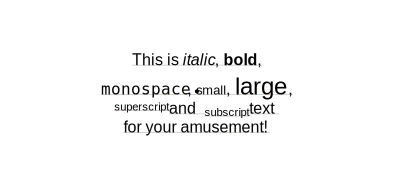

In [4]:
def draw(box, image, show_anchor=True, show_line=False, show_baseline=True):
    if isinstance(box, toyplot.text.Layout):
        if show_anchor:
            xml.SubElement(
                image,
                "circle",
                cx="0",
                cy="0",
                r="2",
                fill="black",
                stroke="none",
            )

    if isinstance(box, toyplot.text.LineBox):
        if show_line:
            xml.SubElement(
                image,
                "rect",
                x=str(box.left),
                y=str(box.top),
                width=str(box.width),
                height=str(box.height),
                fill="none",
                stroke="lightsteelblue",
            )
        
    if isinstance(box, toyplot.text.TextBox):
#        xml.SubElement(
#            image,
#            "rect",
#            x=str(box.left),
#            y=str(box.top),
#            width=str(box.width),
#            height=str(box.height),
#            fill="none",
#            stroke="lightgray",
#        )
        
        baseline_offset = box.baseline

        if show_baseline:
            xml.SubElement(
                image,
                "line",
                x1=str(box.left),
                y1=str(box.bottom - baseline_offset),
                x2=str(box.right),
                y2=str(box.bottom - baseline_offset),
                stroke="lightgray")
        
        style = toyplot.style.combine(
            box.style,
            {"white-space":"pre"},
        )
       
        xml.SubElement(
            image,
            "text",
            x=str(box.left),
            y=str(box.bottom - baseline_offset),
            fill="black",
            stroke="none",
            style=toyplot.style.to_css(style),
        ).text = box.text
        
    for child in box.children:
        draw(child, image)

image = xml.Element(
    "svg",
    width=str(int(layout.width*2 + 10)),
    height=str(int(layout.height*2 + 10)),
    style="border: 1px solid #f0f0f0",
)
group = xml.SubElement(
    image,
    "g",
    transform="translate(%s %s)" % (layout.width + 5, layout.height + 5),
)

draw(layout, group)
IPython.display.SVG(xml.tostring(image))

In [5]:
IPython.display.HTML("<span style='text-anchor: middle; font-family: helvetica; font-size: 16px'>%s</span>" % text)